### Question 8.1

###### Describe a situation or problem from your job, everyday life, current events, etc., for which a linear regression model would be appropriate. List some (up to 5) predictors that you might use.

_______________________________________________________________________________________________________________________________


I have not worked on regression analysis, although I would love to. But one application where I think I might be able to apply this in real life is, football(aka soccer). I am a big fan and a suppoter of a club called Football Club Barcelona. The club owners and the manager of the team always tries to do the best for the club like either buy players from other clubs or hire scouts to scout for potential talents in the game. FC Barcelona as a club has got some of the best players using scouts such as Lionel Messi, who is Greatest Of All Time(GOAT), and currently the new talents like Ansu Fati and Junior Firpo. Upto my understanding usually the players are bought considering who have had the best goals to matches ratio (for forwards) or tackles (for defenders) to matches ratio.


But I think that based on the stats that the scout provides such as (other than the mainstream stats such as age, matches played, goals scored etc) minutes played, number of successful passes completed, number and recurrence of injuries, nation (i can assign numerical metrics to this categorical variable), build up plays leading to goal, or the number of commanding saves when it comes to a goalkeeper, the sports analyst for the club might be able to build a mathematical regression model, and even remove insignificant predictors to build a successful model, buy the successful players. 

### Question 8.2

Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html ), use regression (a useful R function is lm or glm) to predict the observed crime rate in a city with the following data: 
    1. M = 14.0
    2. So = 0
    3. Ed = 10.0
    4. Po1 = 12.0
    5. Po2 = 15.5
    6. LF = 0.640
    7. M.F = 94.0
    8. Pop = 150
    9. NW = 1.1
    10. U1 = 0.120
    11. U2 = 3.6
    12. Wealth = 3200
    13. Ineq = 20.1
    14. Prob = 0.04
    15. Time = 39.0

Show your model (factors used and their coefficients), the software output, and the quality of fit. Note that because there are only 47 data points and 15 predictors, you’ll probably notice some overfitting. We’ll see ways of dealing with this sort of problem later in the course.

In [2]:
crime_df <- read.table("uscrime.txt",header = TRUE)

In [3]:
head(crime_df)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [4]:
str(crime_df)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 

In [5]:
# Checking if there are any Null values in the dataframe

sapply(crime_df, function(x) sum(is.na(x)))

M     So     Ed    Po1    Po2     LF    M.F    Pop     NW     U1     U2 
     0      0      0      0      0      0      0      0      0      0      0 
Wealth   Ineq   Prob   Time  Crime 
     0      0      0      0      0

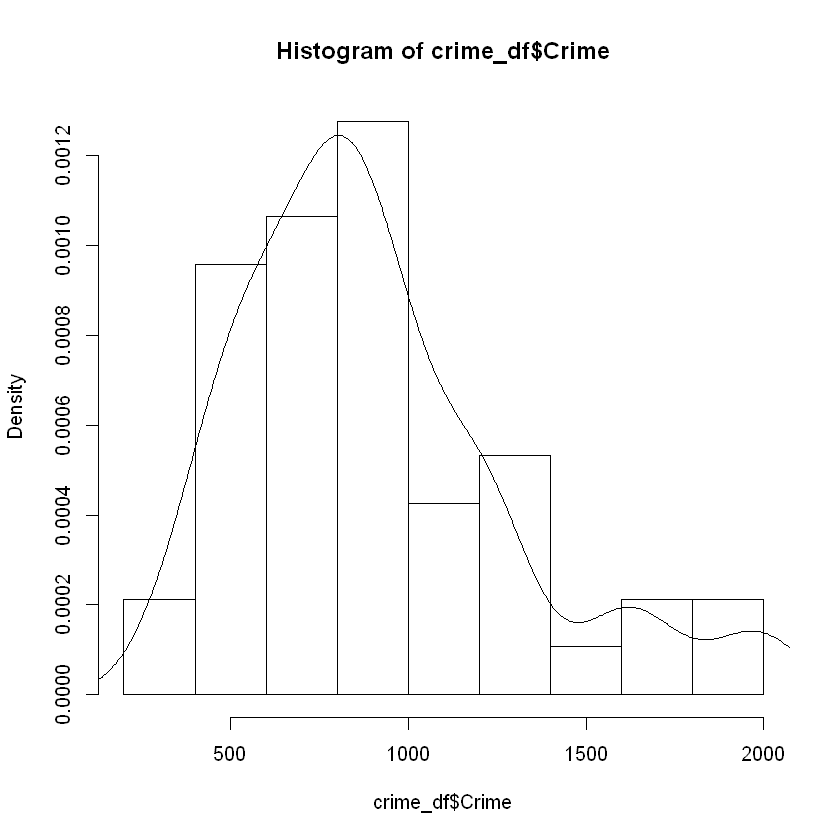

In [6]:
hist(crime_df$Crime, freq = FALSE)
dens <- density(crime_df$Crime)
lines(dens)

Use the following link for understanding the "corrplot" : http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

In [7]:
M<-cor(crime_df)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


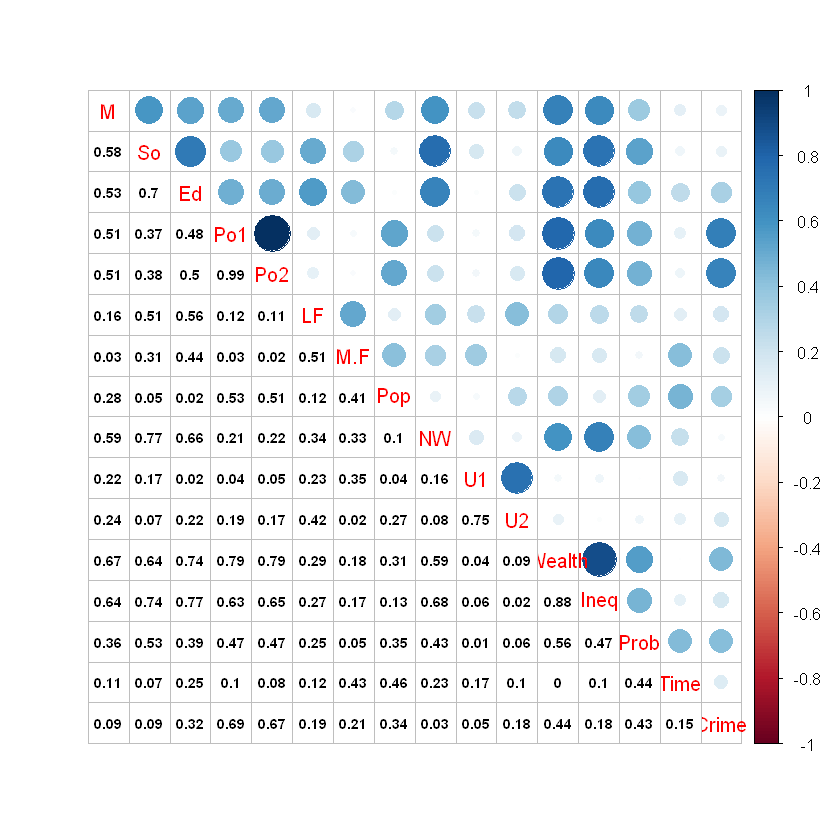

In [8]:
library(corrplot)
corrplot.mixed(abs(M), lower = "number", upper = "circle", lower.col = "black", number.cex = .7)

**From the corrplot, it can be inferred that Crime response is more dependent on Po1, Po2, Pop, Wealth, Prob, and Ed than on the rest of input data**

**They are the inputs with more than 30% correlation to Crime response.**

Next, I am going to create a test dataframe that I will use to predict the regression model. The test dataframe inputs the following predictors:

1. M = 14.0
2. So = 0
3. Ed = 10.0
4. Po1 = 12.0
5. Po2 = 15.5
6. LF = 0.640
7. M.F = 94.0
8. Pop = 150
9. NW = 1.1
10. U1 = 0.120
11. U2 = 3.6
12. Wealth = 3200
13. Ineq = 20.1
14. Prob = 0.04
15. Time = 39.0

**I am going to fit the regression model with all the predictors. Then I will test the quality of this model by predicting the Crime rate for the baseline dataframe.**

In [9]:
base_model <- lm(Crime ~. , data = crime_df)

In [10]:
summary(base_model)


Call:
lm(formula = Crime ~ ., data = crime_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855

###### Understanding the Summary Output: 

From the summary I am able to understand that Predictors such as M, Ed, Ineq, Prob are having p-value < 0.05 meaning they are statistically significant to be as a Predictor to the dependent variable(Crime).


Moreover, the R squared value is 0.8 meaning the model is a good fit for the data. But as we can see the Adjusted R squared is much less than the R squared value meaning the model is Overfitted and there are unwanted predictors which are misleading the value of R squared

In [11]:
# Creating a new dataframe to predict the observed crime rate in a city with the data that was provided

baseline_df <- data.frame(M = 14.0,
                          So = 0,
                          Ed = 10.0,
                          Po1 = 12.0,
                          Po2 = 15.5,
                          LF = 0.640,
                          M.F = 94.0,
                          Pop = 150,
                          NW = 1.1,
                          U1 = 0.120,
                          U2 = 3.6,
                          Wealth = 3200,
                          Ineq = 20.1,
                          Prob = 0.04,
                          Time = 39.0)

In [12]:
# Predicting the output of crime rate in the city for the given data

predict.lm(base_model,baseline_df)

1 
155.4349

**The baseline regression model with all predictors has predicted a crime rate of 155.434896887446.**

To reduce Overfitting probably we can split the data into train and test and fir the model on train and predict on test data.


We can also perform Cross Validation on the data to handle Overfitting.


Reference:http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/